In [1]:
# Code from John Krohn
# https://github.com/jonkrohn/ML-foundations
# https://github.com/jonkrohn
# Mathematical Foundations of Machine Learning

In [2]:
# plotting a system of linear equation


## What linear Algebra is

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Simulate the time from 0 to 40 minutes. A 40 minute cap.<br>
The linspace method allows points from 0 to 40 with n many points inbetween, so here 1000 points inbetween. 

In [4]:
t = np.linspace(0, 40, 1000) # start, finish, n points

The distance travelled by the robber is d=2.5

In [5]:
d_r = 2.5 * t

Distance travelled by the sherrig: d = 3(t-5)

In [6]:
d_s = 3 * (t-5)

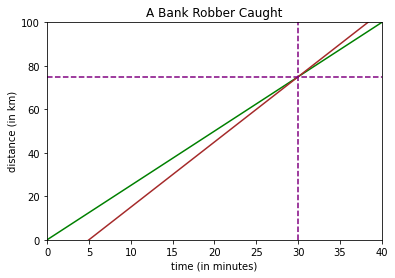

In [7]:
fig, ax = plt.subplots()
plt.title('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0,40])
ax.set_ylim([0,100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')

# let's assume we solved for the unknown
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

#### Linear Algebra Exercise

In [8]:
# solar power example
t = np.linspace(0, 50, 1000) # start, finish, n points
m1 = t
m2 = 4 * t - 120

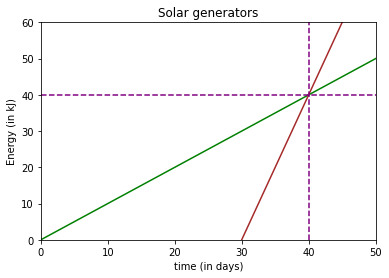

In [9]:
fig, ax = plt.subplots()
plt.title('Solar generators')
plt.xlabel('time (in days)')
plt.ylabel('Energy (in kJ)')
ax.set_xlim([0,50])
ax.set_ylim([0,60])
ax.plot(t, m1, c='green')
ax.plot(t, m2, c='brown')

# let's assume we solved for the unknown
plt.axvline(x=40, color='purple', linestyle='--')
_ = plt.axhline(y=40, color='purple', linestyle='--')

#### Tensors

In [10]:
# tensors are a generalization
# dimension, name, description
# 0, scalars, magnitude only
# 1, vectors, array
# 2, matrix, flat table
# 3, 3-tensor, 3D table
# n, n-tensor, higher dimensional

#### Scalars

In [11]:
# no dimension, single numeric value
# single number
# denoted in lowercase, italics often
# should be typed, like all other tensors: e.g., int, float32
x = 25
x

25

In [12]:
type(x) # not specific enough, use int16, uint8 ..., we need NumPy or another numeric library

int

In [13]:
y = 3

In [14]:
py_sum = x + y
py_sum

28

In [15]:
type(py_sum)

int

In [16]:
x_float = 25.5
float_sum = x_float + y
float_sum

28.5

In [17]:
type(float_sum) # if we interact the int and float together, we get a float out

float

#### Scalars in PyTorch
Eventually a bit more fun and more intuitive for Python users

In [18]:
import torch

In [19]:
x_pt = torch.tensor(25) # type specification optional, e.g.: dtype=torch.float16
x_pt

tensor(25)

In [20]:
x_pt.shape

torch.Size([])

In [21]:
x_pt1 = torch.tensor(25, dtype=torch.float16) # type specification optional, e.g.: dtype=torch.float16
x_pt1

tensor(25., dtype=torch.float16)

In [22]:
x_pt1.shape

torch.Size([])

#### Scalars in TensorFlow
Eventually more mature in production and bigger community

In [23]:
import tensorflow as tf

In [24]:
x_tf = tf.Variable(25, dtype=tf.int16)
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [25]:
x_tf.shape

TensorShape([])

In [26]:
y_tf = tf.Variable(3, dtype=tf.int16) 

In [27]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [28]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [29]:
# convert into NumPy scalar
type(tf_sum.numpy())

numpy.int16

In [30]:
# create a float scalar
x_tf1 = tf.Variable(25, dtype=tf.float16)
x_tf1

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

#### Vectors and Vector Transposition

In [31]:
# create a one dimensional tensor
import numpy as np
x = np.array([25,2,5])
x

array([25,  2,  5])

In [32]:
len(x)

3

In [33]:
x.shape

(3,)

In [34]:
type(x)

numpy.ndarray

In [35]:
x[0]

25

In [36]:
type(x[0])

numpy.int64

In [37]:
# transpose
x_t = x.T
x_t

array([25,  2,  5])

In [38]:
# a regular one-dimensional array has no second dimension to transpose into, we need two sets of square brackets
x_t.shape

(3,)

In [39]:
y = np.array([[25,2,5]])
y.shape

(1, 3)

In [40]:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [41]:
y_t.shape

(3, 1)

In [42]:
y = y_t.T
y

array([[25,  2,  5]])

In [43]:
y.shape

(1, 3)

zero vectors

In [44]:
z = np.zeros(3)
z

array([0., 0., 0.])

#### Vectors in PyTorch and Tensorflow

In [45]:
# PyTorch
x_pt = torch.tensor([25,2,5])
x_pt

tensor([25,  2,  5])

In [46]:
# Tensorflow
x_tf = tf.Variable([25,2,5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

#### Norms and Unit Vectors

In [47]:
# most common used norm is the euclidean distance, manually here
x = np.array([25,2,5])
(25**2+2**2+5**2)**(1/2)

25.573423705088842

In [48]:
np.linalg.norm(x)

25.573423705088842

In [49]:
# another common norm is L1 norm
# used whenever differences 0 and non-0 are key
x = np.array([25,2,5])
np.abs(25)+np.abs(2)+np.abs(5)

32

In [50]:
# squared L2 norm
# squared L2 norm equals simply <x.T,x>
# derivative used to train many ML algorithms, derivative in an element requires that element alone
# grows slowly near origin
x = np.array([25,2,5])
(25**2+2**2+5**2)

654

In [51]:
np.dot(x,x)

654

In [52]:
# max norm
np.max(x)

25

In [53]:
# Lp Norm is the generalization
# p must be a real number

#### Basis, Orthogonal, and Orthonormal Vectors

In [54]:
# Basis vector span up the space
# Orthogonal vectors are at 90 degree angle <x,y>=0
# orthonormal: orthogonal and unit-vector (euclidean distance length of one)
x1 = np.array([1,0])
x2 = np.array([0,1])
np.dot(x1, x2)

0

#### Two dimensional tensors, matrices (and matrixes)

In [55]:
# (n_row, n_col)
X = np.array([[25,2], [5,26], [3,7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [56]:
X.shape

(3, 2)

In [57]:
X.size

6

In [58]:
# select column 1
X[:,0]

array([25,  5,  3])

In [59]:
# select column 2
X[:,1]

array([ 2, 26,  7])

In [60]:
# select middle row
X[1,:]

array([ 5, 26])

In [61]:
# Another slicing example
X[0:2, 1:2]

array([[ 2],
       [26]])

#### Matrices in PyTorch

In [62]:
X_pt = torch.tensor([[25,2], [5,26], [3,7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [63]:
X_pt.shape

torch.Size([3, 2])

In [64]:
# slicing in PyTorch
X_pt[1,:]

tensor([ 5, 26])

#### Matrices in TensorFlow

In [65]:
X_tf = tf.Variable([[25,3], [5,26], [3,7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  3],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [66]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [67]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

In [68]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

In [69]:
#Slicing
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

#### Generic tensor notation: Upper-case, bold, italics, sans serif, e.g. ***X*** #### 
Higher-Rank tensors: As an example, rank 4 tensors are common for images where each dimension corresponds to: 
1. Number of images in training batch, e.g. 32
2. Image height in pixels e.g. 28
3. Image width in pixel e.g. 28
4. Number of color channels, e.g., 3 for full-color images (RGB)

In [70]:
images_pt = torch.zeros([32,28,28,3])
images_pt

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

In [71]:
images_tf = torch.zeros([32,28,28,3])
images_tf

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

#### Exercises

In [72]:
x = torch.tensor([[25, 2, -3, -23]])
x.T

tensor([[ 25],
        [  2],
        [ -3],
        [-23]])

In [73]:
m = torch.tensor([[42, 4, 7, 99], [-99, 3, 17, 22]])
m.shape

torch.Size([2, 4])

In [74]:
m[1,2] # algebraic m[2,3] second row, third column so to say

tensor(17)

## Tensor Transportation

In [75]:
# numpy
X = np.array([[25, 2], [5, 26], [3, 7]])
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [76]:
# tensorflow
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [77]:
# tensorflow
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
tf.transpose(X_tf)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]], dtype=int32)>

#### Basic Tensor Arithmetic, incl. Hadamard Product

In [78]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [79]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [80]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [81]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [82]:
X_pt *2 + 2

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [83]:
torch.add(torch.mul(X_pt, 2), 2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [84]:
X_tf *2 + 2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [85]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [86]:
# Hadamard product (Element wise product)
A = X+2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [87]:
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [88]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [89]:
A_pt = X_pt + 2

In [90]:
A_pt + X_pt

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [91]:
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [92]:
A_tf = X_tf + 2

In [93]:
A_tf + X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [94]:
A_tf * X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]], dtype=int32)>

#### Reduction

In [95]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [96]:
X.sum()

68

In [97]:
torch.sum(X_pt)

tensor(68)

In [98]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [99]:
X.sum(axis = 0)

array([33, 35])

In [100]:
X.sum(axis = 1)

array([27, 31, 10])

In [101]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [102]:
torch.sum(X_pt, 1)

tensor([27, 31, 10])

In [103]:
tf.reduce_sum(X_tf, 0)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([33, 35], dtype=int32)>

In [104]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10], dtype=int32)>

In [105]:
# reductions: summation, maximum, minimum, mean, product

#### Dot product

In [106]:
# <x,y> 
x = np.array([25, 2, 5])

In [107]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [108]:
25 * 0 + 2 * 1 + 5 * 2

12

In [109]:
np.dot(x, y)

12

In [110]:
x_pt

tensor([25,  2,  5])

In [111]:
y_pt = torch.tensor([0, 1, 2])
y_pt

tensor([0, 1, 2])

In [112]:
np.dot(x_pt, y_pt)

12

In [113]:
torch.dot(torch.tensor([25, 2, 5.]), torch.tensor([0, 1, 2.]))

tensor(12.)

In [114]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [115]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [116]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

#### Exercises on Tensor Operations

In [117]:
x_ex1 = torch.tensor([[42, 4, 7, 99], [-99, -3, 17, 22]])
x_ex1.T

tensor([[ 42, -99],
        [  4,  -3],
        [  7,  17],
        [ 99,  22]])

In [118]:
x_ex2 = torch.tensor([[25, 10],[-2, 1]])
y_ex2 = torch.tensor([[-1, 7], [10, 8]])
x_ex2 * y_ex2

tensor([[-25,  70],
        [-20,   8]])

In [119]:
w = torch.tensor([-1, 2, -2])
z = torch.tensor([5, 10, 0])
torch.dot(w, z)

tensor(15)

#### visualizing linear systems

In [120]:
# let's say two equations are 2x - 3y = 15 and 4x + 10y = 14
# this translates to:
y1 = -5 + (2 * x) / 3
y2 = (7 - 2 * x) / 5

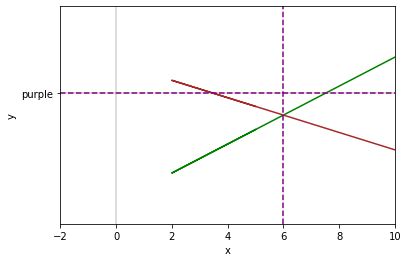

In [121]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

# Add x and y axes
plt.axvline(x = 0, color = 'lightgrey')
plt.axhline(y = 0, color = 'lightgrey')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])
ax.plot(x, y1, c = 'green')
ax.plot(x, y2, c = 'brown')
plt.axvline(x = 6, color = 'purple', linestyle='--')
_ = plt.axhline(y = 'purple', color = 'purple', linestyle='--')


## Matrix properties

#### The Frobenius Norm 
Quantify the size of a matrix

In [122]:
X = np.array([[1,2], [3,4]])
X

array([[1, 2],
       [3, 4]])

In [123]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [124]:
np.linalg.norm(X)

5.477225575051661

In [125]:
X_pt = torch.tensor([[1,2], [3,4.]]) # torch.norm() requires float types

In [126]:
torch.norm(X_pt)

tensor(5.4772)

In [127]:
X_tf = tf.Variable([[1,2], [3,4.]]) # torch.norm() requires float types

In [128]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

#### Matrix multiplication (with a vector)

In [130]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [132]:
b = np.array(([1, 2]))
b

array([1, 2])

In [133]:
np.dot(A, b) # technically dot-product is only for vectors

array([11, 17, 23])

In [134]:
A_pt = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [135]:
b_pt = torch.tensor([1, 2])
b_pt

tensor([1, 2])

In [136]:
torch.matmul(A_pt, b_pt)

tensor([11, 17, 23])

In [138]:
A_tf = tf.Variable([[3, 4], [5, 6], [7, 8]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]], dtype=int32)>

In [139]:
b_tf = tf.Variable([1, 2])
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

In [140]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23], dtype=int32)>

#### Matrix multiplication (with Two Matrices)

In [141]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [142]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [143]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

Matrix multiplication is not commutative, typically not defined or different results

In [144]:
np.dot(B, A)

ValueError: ignored

In [145]:
B_pt = torch.from_numpy(B)
B_pt

tensor([[1, 9],
        [2, 0]])

In [146]:
torch.matmul(A_pt, B_pt)

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [148]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [2, 0]], dtype=int32)>

In [149]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]], dtype=int32)>

#### Symmetric and Identity Matrices

In [150]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [151]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [153]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

#### Identity Matrices

In [154]:
I = torch.tensor([[1, 0, 0],[0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [155]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [156]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])



---

